<a href="https://colab.research.google.com/github/R1A2H1L1/KaggleProject/blob/Entrega2/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install Unidecode
import unidecode
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.0 MB/s eta 0:00:00


Exploración inicial del dataset

In [2]:
students_df = pd.read_csv("train.csv")
students_df

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


In [3]:
print(f"{'Índice':<10} {'Nombre Columna':<35} {'Tipo':<10}")
for i, col in enumerate(students_df.columns, 1):
    print(f"{i:<10} {col:<35} {students_df[col].dtype}")

Índice     Nombre Columna                      Tipo      
1          ID                                  int64
2          PERIODO_ACADEMICO                   int64
3          E_PRGM_ACADEMICO                    object
4          E_PRGM_DEPARTAMENTO                 object
5          E_VALORMATRICULAUNIVERSIDAD         object
6          E_HORASSEMANATRABAJA                object
7          F_ESTRATOVIVIENDA                   object
8          F_TIENEINTERNET                     object
9          F_EDUCACIONPADRE                    object
10         F_TIENELAVADORA                     object
11         F_TIENEAUTOMOVIL                    object
12         E_PRIVADO_LIBERTAD                  object
13         E_PAGOMATRICULAPROPIO               object
14         F_TIENECOMPUTADOR                   object
15         F_TIENEINTERNET.1                   object
16         F_EDUCACIONMADRE                    object
17         RENDIMIENTO_GLOBAL                  object
18         INDICADOR_1    

Limpieza de datos

*Eliminamos* la columna ID y FAMI_TIENEINTERNET.1

In [4]:
students_df = students_df.drop(columns=['ID', 'FAMI_TIENEINTERNET.1'], errors='ignore')
print(students_df.columns)

Index(['PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD',
       'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')


In [5]:
null_counts = students_df.isna().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
dtype: int64


Gráfico de RENDIMIENTO GLOBAL

/tmp/ipython-input-2636879946.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students_df, x='RENDIMIENTO_GLOBAL', palette='pastel')


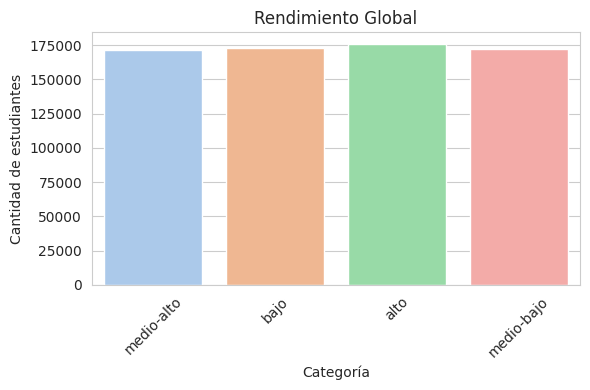

In [6]:
# Definir las categorías válidas
categorias_validas = ['alto', 'medio-alto', 'medio-bajo', 'bajo']

# Filtrar el DataFrame para conservar solo esas categorías
students_df = students_df[students_df['RENDIMIENTO_GLOBAL'].isin(categorias_validas)]

# Volver a graficar
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(data=students_df, x='RENDIMIENTO_GLOBAL', palette='pastel')

plt.title('Rendimiento Global')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Imputación de datos

In [7]:
students_df = students_df.fillna('Faltante')

Codificación one-hot

In [9]:
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(d, col):
    assert sum(d[col].isna())==0, "column must have no NaN values"
    values = np.unique(d[col])
    k = to_onehot(d[col].values)
    r = d.join(pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=d.index), how='outer')
    del(r[col])
    return r

columns_to_onehot =[
    'F_TIENEINTERNET',
    'E_PAGOMATRICULAPROPIO'

]
onehoted_df = students_df.copy()
for col in columns_to_onehot:
  onehoted_df = replace_column_with_onehot(onehoted_df, col)
onehoted_df

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,0.322,0.208,0.310,0.267,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,0.311,0.215,0.292,0.264,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,0.297,0.214,0.305,0.264,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,No sabe,Si,No,N,...,0.485,0.172,0.252,0.190,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Primaria completa,Si,Si,N,...,0.316,0.232,0.285,0.294,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Secundaria (Bachillerato) completa,Si,No,N,...,0.237,0.271,0.271,0.311,0,0,1,0,0,1
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Primaria incompleta,Si,No,N,...,0.314,0.240,0.278,0.260,0,0,1,0,1,0
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,0.286,0.240,0.314,0.287,0,0,1,0,0,1
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,Primaria completa,No,No,N,...,0.132,0.426,0.261,0.328,0,1,0,0,0,1


In [11]:
print(students_df['E_VALORMATRICULAUNIVERSIDAD'].unique())
print("\nSe asignarán números a las categorías, 0 para 'Faltante' y a partir de 1 para los demás valores.")


['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' 'Faltante']

Se asignarán números a las categorías, 0 para 'Faltante' y a partir de 1 para los demás valores.


In [13]:
data_matricula_dict = {
    'Faltante': 0,
    'No pagó matrícula': 1,
    'Menos de 500 mil': 2,
    'Entre 500 mil y menos de 1 millón': 3,
    'Entre 1 millón y menos de 2.5 millones': 4,
    'Entre 2.5 millones y menos de 4 millones': 5,
    'Entre 4 millones y menos de 5.5 millones': 6,
    'Entre 5.5 millones y menos de 7 millones': 7,
    'Más de 7 millones': 8,
}

def replace_category_for_numbers(df, column_name, mapping_dict):
    df[column_name] = df[column_name].map(mapping_dict)
    return df

onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "E_VALORMATRICULAUNIVERSIDAD",
    data_matricula_dict
)

onehoted_df.head()


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,0.322,0.208,0.310,0.267,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,0,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,0.311,0.215,0.292,0.264,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,0.297,0.214,0.305,0.264,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,0,Estrato 4,No sabe,Si,No,N,...,0.485,0.172,0.252,0.190,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,Entre 21 y 30 horas,Estrato 3,Primaria completa,Si,Si,N,...,0.316,0.232,0.285,0.294,0,0,1,0,1,0


In [15]:
print(students_df["E_HORASSEMANATRABAJA"].unique())

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' 'Faltante']


In [17]:
# Diccionario para convertir categorías en números
data_working_hours_dict = {
    'Faltante': 0,
    '0': 1,
    'Menos de 10 horas': 2,
    'Entre 11 y 20 horas': 3,
    'Entre 21 y 30 horas': 4,
    'Más de 30 horas': 5,
}

onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "E_HORASSEMANATRABAJA",
    data_working_hours_dict)
onehoted_df.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,Estrato 3,Técnica o tecnológica incompleta,Si,Si,N,...,0.322,0.208,0.310,0.267,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,Estrato 3,Técnica o tecnológica completa,Si,No,N,...,0.311,0.215,0.292,0.264,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,Estrato 3,Secundaria (Bachillerato) completa,Si,No,N,...,0.297,0.214,0.305,0.264,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,Estrato 4,No sabe,Si,No,N,...,0.485,0.172,0.252,0.190,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,Estrato 3,Primaria completa,Si,Si,N,...,0.316,0.232,0.285,0.294,0,0,1,0,1,0


In [19]:
print(students_df["F_ESTRATOVIVIENDA"].unique())

['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' 'Faltante'
 'Estrato 6' 'Sin Estrato']


In [20]:
data_estrato_dict = {
    'Faltante': -1,
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
}

onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "F_ESTRATOVIVIENDA",
    data_estrato_dict)
onehoted_df.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,Técnica o tecnológica incompleta,Si,Si,N,...,0.322,0.208,0.310,0.267,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,Técnica o tecnológica completa,Si,No,N,...,0.311,0.215,0.292,0.264,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,Secundaria (Bachillerato) completa,Si,No,N,...,0.297,0.214,0.305,0.264,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,No sabe,Si,No,N,...,0.485,0.172,0.252,0.190,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,Primaria completa,Si,Si,N,...,0.316,0.232,0.285,0.294,0,0,1,0,1,0


In [25]:
onehoted_df = replace_category_for_numbers(
    onehoted_df,
    "F_EDUCACIONMADRE",
    data_education_dict)
onehoted_df.head()

,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,20212,ENFERMERIA,BOGOTÁ,7,2,3,Técnica o tecnológica incompleta,Si,Si,N,...,0.322,0.208,0.310,0.267,0,0,1,0,1,0
1,20212,DERECHO,ATLANTICO,5,1,3,Técnica o tecnológica completa,Si,No,N,...,0.311,0.215,0.292,0.264,0,1,0,0,1,0
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,5,5,3,Secundaria (Bachillerato) completa,Si,No,N,...,0.297,0.214,0.305,0.264,0,0,1,0,1,0
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,6,1,4,No sabe,Si,No,N,...,0.485,0.172,0.252,0.190,0,0,1,0,1,0
4,20212,PSICOLOGIA,ANTIOQUIA,5,4,3,Primaria completa,Si,Si,N,...,0.316,0.232,0.285,0.294,0,0,1,0,1,0


 Limpieza y normalización de texto

In [27]:

formated_df = onehoted_df.copy()

def clean_text(text):
    corrections = {
        '3DEG ': '',
        ' PRIMARIA ': ' ',
        ' PRIMARIA:': ' ',
        'INGENIER?A': 'INGENIERIA',
        'II': 'I',
        'EDUCACI?N': 'EDUCACION',
        'F?SICA': 'FISICA',
        'RECREACI?N': 'RECREACION',
        '?NFASIS': 'ENFASIS',
        'INGL?S': 'INGLES',
        'DISE?O': 'DISENO',
        'COMUNICACI?N': 'COMUNICACION',
        'QU?MICA': 'QUIMICA',
        'MATEM?TICAS': 'MATEMATICAS',
        'EL?CTRICA': 'ELECTRICA',
        'M?SICA': 'MUSICA',
        'DISE??O': 'DISENO',
        'COMUNICACI??N': 'COMUNICACION',
        'QU?MICA': 'QUIMICA',
        'GESTI?N': 'GESTION',
        'GR??FICA': 'GRAFICA',
        'B?SICA': 'BASICA',
        'ADMINISTRACI?N': 'ADMINISTRACION',
        'P?BLICA': 'PUBLICA',
        'FARMAC?UTICA': 'FARMACEUTICA',
        'FILOSOF?A': 'FILOSOFIA',
        'ESC?NICAS': 'ESCENICAS',
        'ECONOM?A': 'ECONOMIA',
        'GASTRONOM?A': 'GASTRONOMIA',
        'GEOLOG?A': 'GEOLOGIA',
        'LOG?STICA': 'LOGISTICA',
        'ART?STICA': 'ARTISTICA',
        'PEDAGOG?A': 'PEDAGOGIA',
        ' DE ': ' ',
        ' EN ': ' ',
        '  ': ' ',
        '.': '',
        '- ': ' ',
    }
    for wrong, right in corrections.items():
        text = text.replace(wrong, right)
    return text

# Limpiar y normalizar el texto de la columna E_PRGM_ACADEMICO
formated_df["E_PRGM_ACADEMICO"] = formated_df["E_PRGM_ACADEMICO"].map(unidecode.unidecode)  # Quitar acentos
formated_df["E_PRGM_ACADEMICO"] = formated_df["E_PRGM_ACADEMICO"].str.upper()               # Pasar a mayúsculas
formated_df["E_PRGM_ACADEMICO"] = formated_df["E_PRGM_ACADEMICO"].map(clean_text)           # Corregir palabras mal escritas

# Quitar acentos en la columna E_PRGM_DEPARTAMENTO
formated_df["E_PRGM_DEPARTAMENTO"] = formated_df["E_PRGM_DEPARTAMENTO"].map(unidecode.unidecode)

Correlación entre variables numéricas

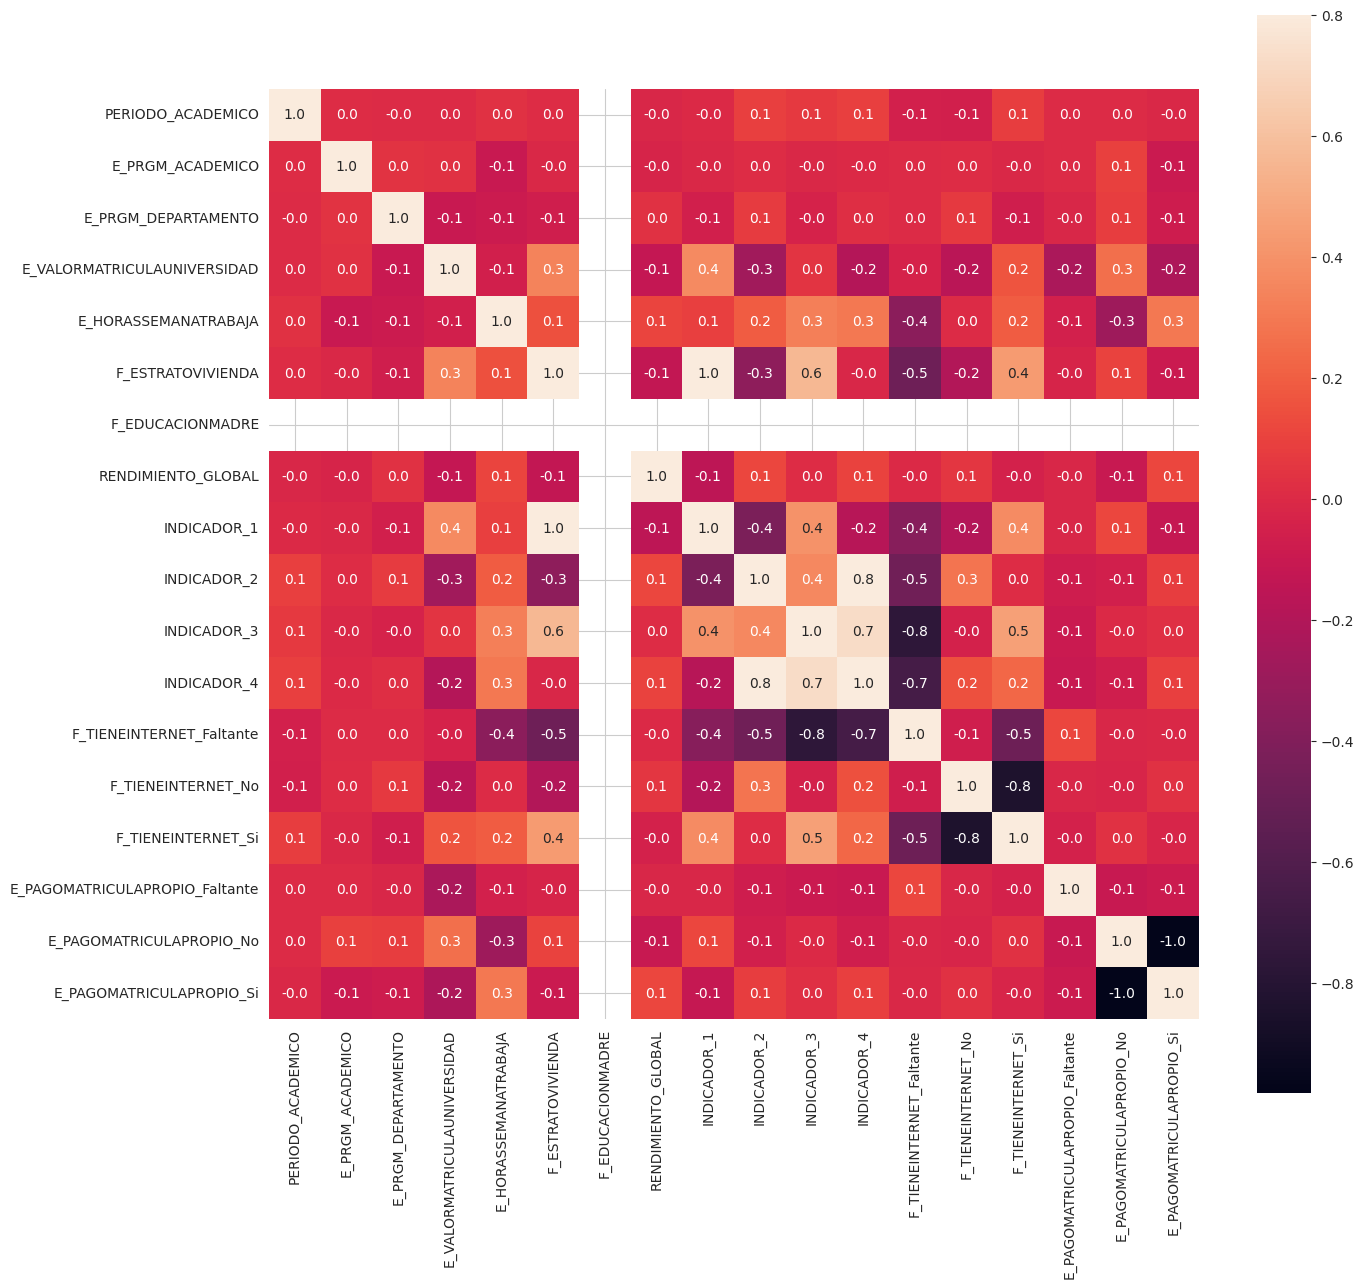

In [29]:
df_encoded = formated_df.copy()

# Convertir categorías a códigos numéricos en las columnas clave
for col in ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'RENDIMIENTO_GLOBAL']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Seleccionar solo columnas numéricas para correlación
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Calcular matriz de correlación solo con datos numéricos
corrmat = numeric_df.corr()

# Graficar heatmap
plt.figure(figsize=(15,14))
sns.heatmap(corrmat, annot=True, vmax=0.8, square=True, fmt=".1f")
plt.show()


Normalización de todas las columnas numéricas

In [31]:
from sklearn.preprocessing import MinMaxScaler

def normalize_dataframe(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df_normalized

# Normalizar el DataFrame onehoted_df
onehoted_df_normalized = normalize_dataframe(onehoted_df)

onehoted_df_normalized.head()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,...,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,F_TIENEINTERNET_Faltante,F_TIENEINTERNET_No,F_TIENEINTERNET_Si,E_PAGOMATRICULAPROPIO_Faltante,E_PAGOMATRICULAPROPIO_No,E_PAGOMATRICULAPROPIO_Si
0,0.966667,ENFERMERIA,BOGOTÁ,0.875,0.4,0.571429,Técnica o tecnológica incompleta,Si,Si,N,...,0.490107,0.427105,0.968750,0.804217,0.0,0.0,1.0,0.0,1.0,0.0
1,0.966667,DERECHO,ATLANTICO,0.625,0.2,0.571429,Técnica o tecnológica completa,Si,No,N,...,0.473364,0.441478,0.912500,0.795181,0.0,1.0,0.0,0.0,1.0,0.0
2,0.666667,MERCADEO Y PUBLICIDAD,BOGOTÁ,0.625,1.0,0.571429,Secundaria (Bachillerato) completa,Si,No,N,...,0.452055,0.439425,0.953125,0.795181,0.0,0.0,1.0,0.0,1.0,0.0
3,0.400000,ADMINISTRACION DE EMPRESAS,SANTANDER,0.750,0.2,0.714286,No sabe,Si,No,N,...,0.738204,0.353183,0.787500,0.572289,0.0,0.0,1.0,0.0,1.0,0.0
4,0.966667,PSICOLOGIA,ANTIOQUIA,0.625,0.8,0.571429,Primaria completa,Si,Si,N,...,0.480974,0.476386,0.890625,0.885542,0.0,0.0,1.0,0.0,1.0,0.0
